# Temporal Evolution of Potential Temperature

In [1]:
%matplotlib inline

In [2]:
import sys, os
import numpy as np
import pylab as plt
import pandas as pd

import seaborn as sns
sns.set_context( 'talk' )

In [3]:
import xarray as xr

## Open Data

In [4]:
input_dir = '/work/bb1262/work_archive/bm0834/data/wifi-aus/statistics/'

dset = xr.open_dataset( f'{input_dir}/temperature-perturbations-by-latitude.nc')
theta = dset['tpot']

## Analysis

* mean theta

In [5]:
thetam = theta.mean('time')

* Apply lower Stratosphere Masking

In [6]:
tref = thetam.sel( stats = 'reference' ).mean('mode')

In [7]:
mask = np.logical_and(tref > 380, tref < 500 )
mask = np.logical_and(tref.plev > 50e2, tref.plev < 100e2 )

dtheta_mean = theta.where( mask ).mean('plev')
dtheta_max = theta.where( mask ).max('plev')


In [8]:
theta['plev'] = theta.plev * 1e-2
theta['plev'].attrs['units'] = 'hPa'
theta['plev'].attrs['long_name'] = 'pressure'


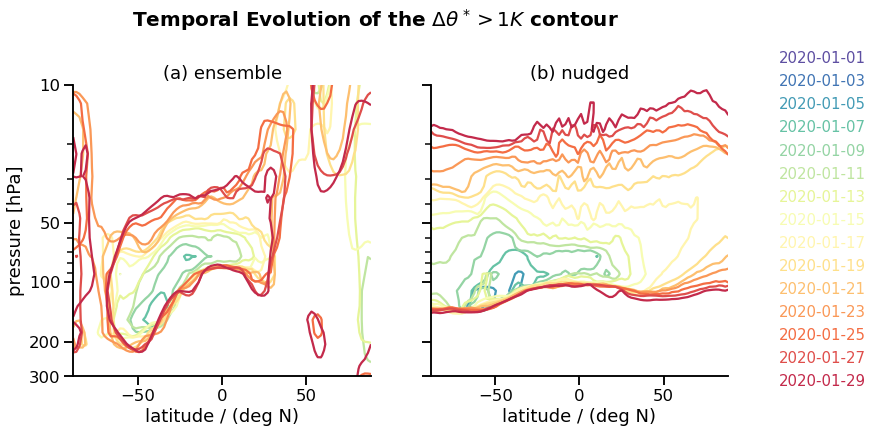

In [9]:
import matplotlib.colors as mcol
cmap = plt.cm.Spectral_r

fig, axs = plt.subplots( ncols = 2, figsize = (14,6), sharey = True)
plt.subplots_adjust(right = 0.85, left = 0.2, top = 0.8)

it_start = 0
it_end = 30
it_step = 2
it = 100

mode = 'fire1.0'
for imode, stat in enumerate( ['mean', 'nudged', ]):
    for it in range(it_start, it_end, it_step):
        irel = (1.*it - it_start) / (it_end - it_start)
        crgb = cmap(irel)
        chex = mcol.to_hex( crgb )
        d = theta.sel(stats = stat, mode = mode).isel(time = it)
        d.plot.contour( levels = [1,], 
                        colors = [chex,], 
                        yscale = 'log',
                        ax = axs[imode],
                        yincrease = False, 
                        ylim = (300, 10))
        if imode == 0:
            date = str( d.time.data.astype('datetime64[D]' ) )
            plt.figtext( 0.9, 0.85 - 0.8  * irel, date, c = chex, fontsize = 'small')
            axs[imode].set_title('(a) ensemble')
        
        else:
            axs[imode].set_ylabel('')
            axs[imode].set_title('(b) nudged')
            
        axs[imode].set_yticks([10, 50, 100, 200, 300], )
        axs[imode].set_yticklabels([10, 50, 100, 200, 300], )
        axs[imode].set_xlabel('latitude / (deg N)')
        
plt.suptitle( r'Temporal Evolution of the $\Delta \theta^* > 1 K$ contour',fontsize = 20, fontweight = 'bold' )
sns.despine()

plt.savefig('../pics/temp-anomaly-contours.png', dpi = 600)

## Comparison of Fire Strengths 

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/xarray/plot/plot.py:1415: UserWarning: No contour levels were found within the data range.
  primitive = ax.contour(x, y, z, **kwargs)


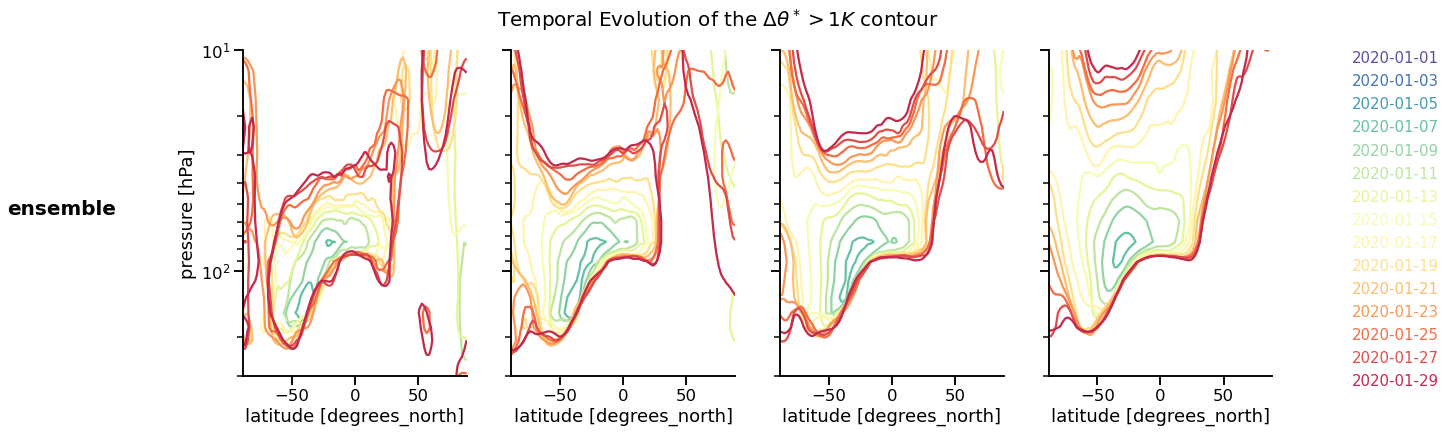

In [10]:
import matplotlib.colors as mcol
cmap = plt.cm.Spectral_r

fig, axs = plt.subplots( ncols = 4, figsize = (22,6), sharey = True)
plt.subplots_adjust(right = 0.85, left = 0.2)

it_start = 0
it_end = 30
it_step = 2
it = 100

mode_scale = [1, 2, 3, 5]

for imode, mode in enumerate( theta.mode ):
    for it in range(it_start, it_end, it_step):
        irel = (1.*it - it_start) / (it_end - it_start)
        crgb = cmap(irel)
        chex = mcol.to_hex( crgb )
        d = theta.sel(stats = 'mean', mode = mode).isel(time = it) / mode_scale[imode]
        d.plot.contour( levels = [1,], 
                        colors = [chex,], 
                        yscale = 'log',
                        ax = axs[imode],
                        yincrease = False, 
                        ylim = (300, 10))
        if imode == 0:
            date = str( d.time.data.astype('datetime64[D]' ) )
            plt.figtext( 0.9, 0.85 - 0.8  * irel, date, c = chex, fontsize = 'small')
        else:
            axs[imode].set_ylabel('')
        axs[imode].set_title('')
        
plt.suptitle( r'Temporal Evolution of the $\Delta \theta^* > 1 K$ contour',fontsize = 20 )
plt.figtext(0.12, 0.5, 'ensemble', fontsize = 20, fontweight = 'bold', ha = 'right')
sns.despine()

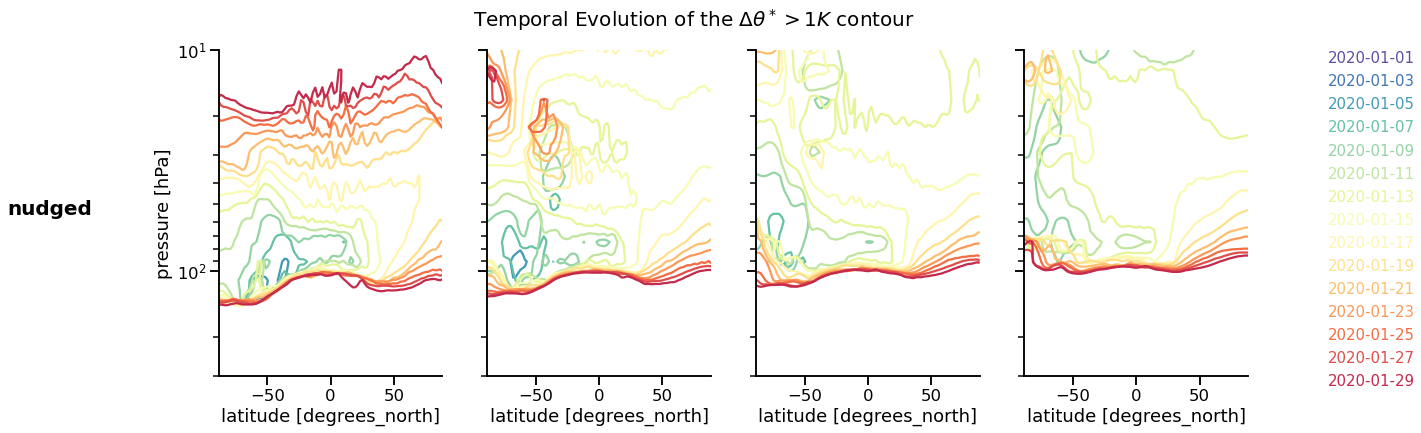

In [11]:
import matplotlib.colors as mcol
cmap = plt.cm.Spectral_r

fig, axs = plt.subplots( ncols = 4, figsize = (22,6), sharey = True)
plt.subplots_adjust(right = 0.85, left = 0.2)

it_start = 0
it_end = 30
it_step = 2
it = 100

mode_scale = [1, 2, 3, 5]

for imode, mode in enumerate( theta.mode ):
    for it in range(it_start, it_end, it_step):
        irel = (1.*it - it_start) / (it_end - it_start)
        crgb = cmap(irel)
        chex = mcol.to_hex( crgb )
        d = theta.sel(stats = 'nudged', mode = mode).isel(time = it) / mode_scale[imode]
        d.plot.contour( levels = [1,], 
                        colors = [chex,], 
                        yscale = 'log',
                        ax = axs[imode],
                        yincrease = False, 
                        ylim = (300, 10))
        if imode == 0:
            date = str( d.time.data.astype('datetime64[D]' ) )
            plt.figtext( 0.9, 0.85 - 0.8  * irel, date, c = chex, fontsize = 'small')
        else:
            axs[imode].set_ylabel('')
        axs[imode].set_title('')
        
plt.suptitle( r'Temporal Evolution of the $\Delta \theta^* > 1 K$ contour',fontsize = 20 )
plt.figtext(0.12, 0.5, 'nudged', fontsize = 20, fontweight = 'bold', ha = 'right')
sns.despine()

## Appendix: Hovmueller Plots 

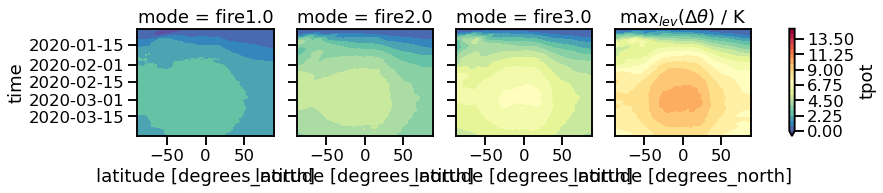

In [12]:
dtheta_mean.sel(stats='nudged').plot.contourf(levels = 21, x = 'lat', col = 'mode', cmap = plt.cm.Spectral_r, vmin = 0, vmax = 15)

plt.title( r'$\max{}_{lev}( \Delta \theta$) / K', )
plt.gca().invert_yaxis()

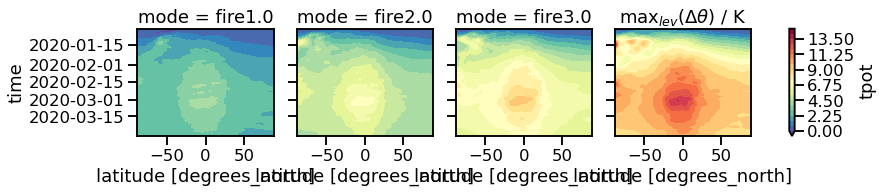

In [13]:
dtheta_max.sel(stats='nudged').plot.contourf(levels = 21, x = 'lat', col = 'mode', cmap = plt.cm.Spectral_r, vmin = 0, vmax = 15)

plt.title( r'$\max{}_{lev}( \Delta \theta$) / K', )
plt.gca().invert_yaxis()

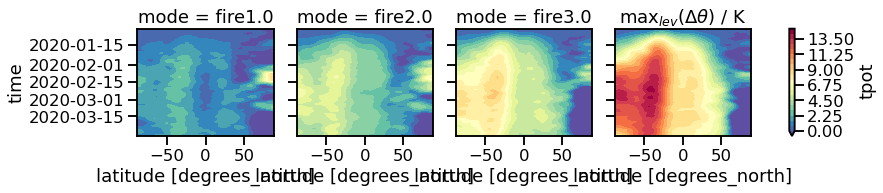

In [14]:
dtheta_mean.sel(stats='mean').plot.contourf(levels = 21, x = 'lat', col = 'mode', cmap = plt.cm.Spectral_r, vmin = 0, vmax = 15)

plt.title( r'$\max{}_{lev}( \Delta \theta$) / K', )
plt.gca().invert_yaxis()

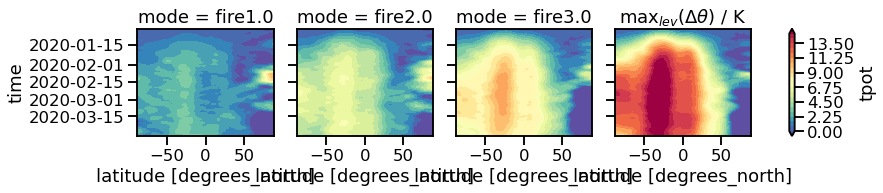

In [15]:
dtheta_max.sel(stats='mean').plot.contourf(levels = 21, x = 'lat', col = 'mode', cmap = plt.cm.Spectral_r, vmin = 0, vmax = 15)

plt.title( r'$\max{}_{lev}( \Delta \theta$) / K', )
plt.gca().invert_yaxis()